**Import the necessary libraries:**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score


**Load the dataset using pandas:**

In [2]:
data = pd.read_csv('android_traffic.csv', sep=';')

**Replace NaN values with 0**


In [3]:
data = data.fillna(0)

**Create a new DataFrame that does not have a 'type' column.**

In [4]:
X = data.drop('type', axis=1)
y = data['type']

**Change a string column to numeric:**

In [5]:
X = pd.get_dummies(X)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

**Split the dataset into training and testing sets:**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train the Logistic Regression model:**

In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [8]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

**Menampilkan confusion matrix**

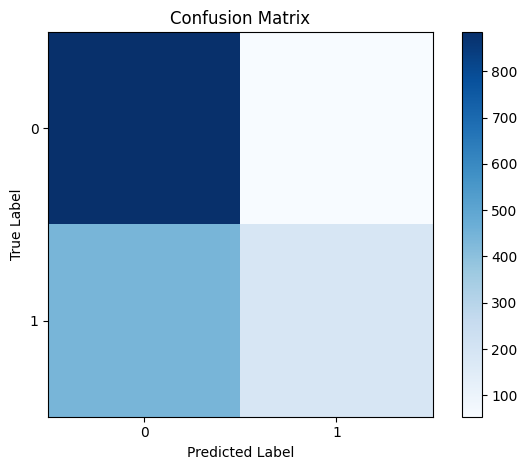

In [9]:
# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = np.unique(y)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

**Receiver Operating Characteristic (ROC) Curve**

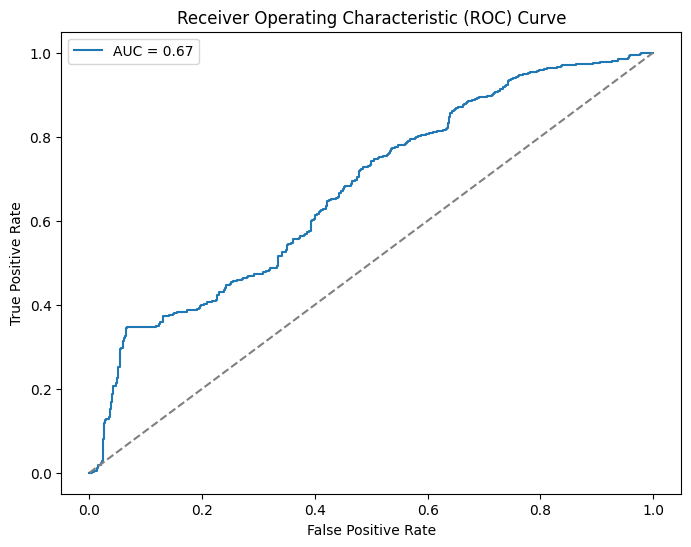

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Menilai kemungkinan prediksi pada data uji
y_prob = model.predict_proba(X_test)[:, 1]

# Menghitung nilai TPR (True Positive Rate), FPR (False Positive Rate), dan threshold
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

# Menghitung nilai AUC (Area Under Curve)
area_under_curve = roc_auc_score(y_test, y_prob)

# Plot kurva ROC (Receiver Operating Characteristic)
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, label=f'AUC = {area_under_curve:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()



**Precision-Recall Curve**

In [11]:
# Menghitung nilai precision, recall, dan threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Menghitung nilai Average Precision (AP)
ap = average_precision_score(y_test, y_prob)
print(f"Average Precision (AP): {ap:.4f}")


Average Precision (AP): 0.5725


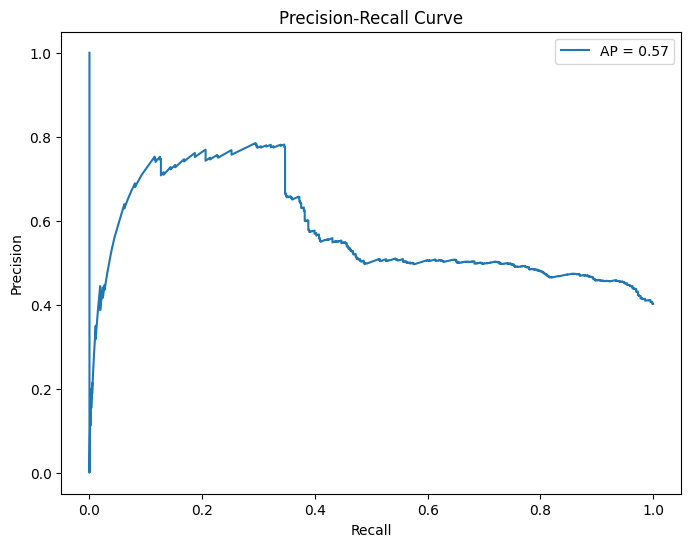

In [12]:
# Menghitung nilai precision, recall, dan threshold
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Menghitung nilai Average Precision (AP)
ap = average_precision_score(y_test, y_prob)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'AP = {ap:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

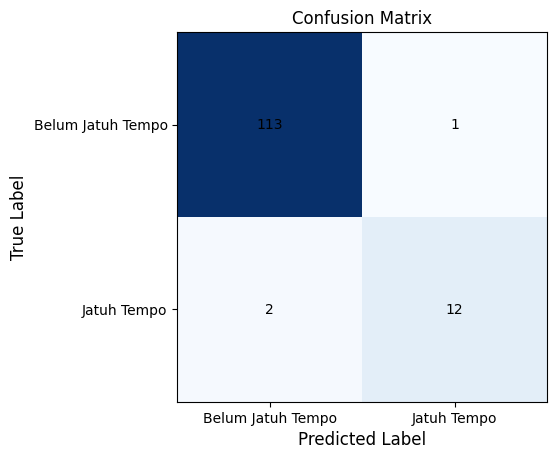

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Definisikan matriks confusion
matrix = np.array([[113, 1],
                   [2, 12]])

# Definisikan label untuk sumbu x dan y
labels = ['Belum Jatuh Tempo', 'Jatuh Tempo']

# Tampilkan matriks dalam bentuk heatmap
plt.title('Confusion Matrix')
plt.imshow(matrix, cmap='Blues', interpolation='nearest')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.xticks(np.arange(matrix.shape[1]), labels, fontsize=10)
plt.yticks(np.arange(matrix.shape[0]), labels, fontsize=10)

# Tambahkan anotasi untuk setiap sel
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        plt.annotate(str(matrix[i][j]), xy=(j, i), ha='center', va='center', fontsize=10)

plt.show()

In [52]:
import pandas as pd
from IPython.display import display, HTML

# Create the DataFrame
data = pd.DataFrame({
  "Status": ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC Score"],
  "Value": [0.6832377310388783, 0.7768595041322314, 0.2979397781299525, 0.4306987399770905, 0.6742757798059735]
})

df = pd.DataFrame(data, columns=['Status', 'Value'])
display(df)

,Status,Value
0,Accuracy,0.683238
1,Precision,0.776860
2,Recall,0.297940
3,F1 Score,0.430699
4,ROC AUC Score,0.674276
